# Useful methods
## numpy
    np.nan - получить значение NaN
## pandas
    .dropna() - получить df/series без NaN записей

# Tasks
1. Импортируйте библиотеку **pandas** как **pd**. Загрузите два датасета **user_data** и **logs**. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (**success == True**)
3. C какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет).
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя **sns.countplot** (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

# Datasets
    3_user_data.csv
    3_logs.csv

# Data description
Описание данных

user_data:

    client – идентификатор пользователя
    premium – является ли клиент премиум
    age – возраст

logs:

    client – идентификатор пользователя
    success – результат (успех - 1, нет - 0)
    platform – платформа
    time – время в формате Unix


In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

### Task 1

In [3]:
!ls

3_logs.csv  3_user_data.csv  pandas_advanced.ipynb


In [4]:
df_user_data = pd.read_csv('3_user_data.csv')

In [5]:
df_user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [6]:
df_logs = pd.read_csv('3_logs.csv')

In [7]:
df_logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [8]:
# оффтоп: примерное количество лет
# Unix-время - число секунд с 1970г. 1 января 00:00
print((1585412213 // 3600) // 24 // 360)

50


In [9]:
# размерности датафрейма
df_user_data.shape

(2954, 3)

In [10]:
# размерности датафрейма
df_logs.shape

(4500, 4)

In [11]:
# тип переменных датафрейма
df_user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [12]:
# тип переменных датафрейма
df_logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [13]:
# проверка на NaN
if df_logs.shape[0] == df_logs.dropna().shape[0] and df_user_data.shape[0] == df_user_data.dropna().shape[0]:
    print('No NaN in dataset(s) ^^')
    print("""
        ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⢔⣦⣶⣿⣿⣿⣿⡷⠖⠒⠀⠀⠀⠀⠀⠀⠀⠀⣀⠀⠉⠁⠂⠀⠀⢀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⣰⠶⣦⡤⣄⠀⠀⠀⠀⠀⠀⣠⠖⢩⣶⣿⣿⣿⣿⣿⠟⢉⣠⠔⠊⠁⠀⠀⠀⣀⣄⠀⠀⠉⠑⢦⣠⣤⣤⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠘⢷⣌⡧⡾⠀⠀⠀⠀⡠⠊⢁⣴⣿⣿⣿⣿⣿⢟⣠⡾⠟⠁⠀⣀⣤⣶⠞⣫⠟⠁⠀⢀⠄⠀⢀⠙⢿⣿⣿⣷⣄
⠀⠀⠀⠀⢠⠀⠀⠀⠀⠀⠉⠉⠁⠀⠀⣠⣾⣶⣶⣿⣿⣿⣿⣿⣿⣷⡿⠋⣀⣤⣶⣿⣿⣋⣴⡞⠁⠀⠀⣠⠊⠀⠀⢸⡄⢨⣿⣿⣿⣿
⠀⠀⠀⠀⠀⢃⠀⠀⠀⠀⠀⠀⠀⠀⣼⣿⣿⣿⠿⠿⢻⣿⣿⣿⣿⣿⣿⠿⠛⢉⣴⣿⢿⣿⠏⠀⠀⠀⡴⠃⣰⢀⠀⢸⣿⣤⣏⢻⣿⣿
⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⢀⣾⡿⣿⡿⠁⠀⢀⣾⣿⣿⣿⡿⠋⠁⠀⣠⣿⠟⢡⣿⡟⠀⢀⣤⣾⠁⣼⣿⢸⡇⢸⣿⣿⣿⡈⣿⣿
⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⢀⣾⠋⣼⣿⠁⢀⠀⣼⣿⣿⠟⠁⠀⠀⠀⣰⡿⠋⢠⣿⡿⠁⢠⣾⣿⡏⢀⣿⣿⣾⣿⢸⣿⣿⣿⡇⢹⣿
⠀⠀⠀⢰⡶⣤⣤⣄⠀⠀⠀⡼⠁⣼⣿⣿⣾⣿⣰⣿⠟⠁⠀⠀⠀⠀⢠⡿⠁⠀⣾⣿⠃⢠⣿⢿⡿⠁⠸⢿⣿⣿⣿⣿⣿⣿⣿⣿⠸⣿
⠀⠀⠀⠘⣧⣈⣷⡟⠀⠀⣰⠁⡼⢻⣿⣿⣿⣿⡿⠋⠀⠀⠂⠒⠒⠒⣾⠋⠀⢠⣿⡏⢠⣿⢃⡿⠁⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⠀⣿
⠀⠀⠀⠀⠈⠉⠁⠀⠀⢠⠇⣰⠁⠸⣹⣿⣿⠟⠀⠀⠀⠀⠀⠀⠀⠐⡇⠀⠀⢸⣿⢃⣿⠋⣿⡀⠀⠀⠀⠈⣿⣿⣿⣿⣿⣿⣿⣿⠀⡇
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣰⠃⡀⢀⣿⣿⡏⢘⣶⣶⣶⣷⣒⣄⠀⠀⠀⠀⠀⠸⣿⣾⠃⠰⠁⠙⢦⡀⠀⠀⢹⣿⣿⣿⣿⣿⣿⣿⢠⡇
⠀⠀⠀⠀⠀⠀⠀⠀⠀⡔⢁⠞⢁⣾⣿⣿⣷⠟⠁⣠⣾⣿⣿⣧⠀⠀⠀⠀⠀⠀⣿⡏⠀⠀⠀⠀⠀⠙⢦⡀⠀⢿⣿⣿⣿⣿⣿⣿⣸⠃
⠀⠀⠀⠀⠀⠀⠀⣠⣾⡖⠁⣠⣾⣿⣿⣿⡏⠀⢰⠿⢿⣿⣯⣼⠁⠀⠀⠀⠀⠀⠹⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⢬⣿⣿⡘⣿⣿⣏⣿⠀
⠀⠀⠀⠀⠀⣠⣾⢟⠋⣠⣾⣿⡿⠋⢿⣿⠀⠀⢼⠀⠀⢀⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣙⣷⣴⣆⡀⠀⠀⠈⢿⣧⠸⣿⣿⣿⣿
⠀⠀⢀⡤⠞⢋⣴⣯⣾⡿⠟⠋⠀⠀⢸⣿⡆⠀⠸⡀⠉⢉⡼⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⣿⣿⣿⣿⣶⣆⠀⠈⢿⣧⠹⣿⣿⣿
⠀⠀⠀⣸⣶⣿⣿⠟⠋⠀⠀⠀⠀⣴⡎⠈⠻⡀⠈⠛⠋⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠿⠛⠛⠻⣿⣬⡏⠻⣷⡀⠈⢻⣿⣿⣿⣿
⢂⣠⣴⣿⡿⢋⣼⣿⣿⣿⣿⣿⠋⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠺⡄⠀⠀⢀⡾⣿⠁⠀⢹⡇⠀⢠⣿⣿⣿⣿
⣿⣿⣽⣯⣴⣿⣿⠿⡿⠟⠛⢻⡤⠚⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡇⠈⠉⢉⡴⠃⠀⠀⢸⠇⢠⣿⣿⣿⣿⣿
⣿⡇⣿⠿⣯⡀⠀⠀⠈⣦⡴⠋⠀⠀⢀⠨⠓⠤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⠷⠒⠋⠀⠀⠀⠀⠃⣴⣿⠿⣡⣿⠏⠀
⠁⠀⠃⠀⠈⠳⣤⠴⡻⠋⠀⢀⡠⠊⠁⠀⠀⢀⡽⢄⠀⠘⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⣾⣿⠏⣺⠟⠁⠀⠀
⠀⠀⠀⠀⠀⡰⠋⢰⠁⠀⠀⠀⠀⠀⣀⠤⠊⠁⠀⠀⢱⡀⠘⢆⡀⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠖⠛⠛⢉⣤⠞⠁⠀⠀⠀⠀
⠀⠀⠀⠀⡜⠁⠀⠈⢢⡀⠀⠀⠀⠀⠁⠀⠀⠀⣀⠔⠋⢱⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⡞⠉⠀⠀⠀⣀⠀⠀⠈
⠀⠀⠀⡜⠀⠀⠀⠀⢰⠑⢄⠀⠀⠀⠀⠀⠀⠊⠀⢀⣀⢀⠇⠀⡠⠒⠒⢶⠈⠉⠑⡖⠈⠓⢢⠤⢄⣀⣴⣾⣏⠉⠛⠋⠉⠉⠀⠀⠀⢠
⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠑⣄⡀⠀⠀⠀⠀⠀⠀⣹⡿⢤⣼⠃⠀⠀⢸⠀⠀⠀⡇⠀⠀⢸⠀⠀⠈⣿⣿⣿⣦⣀⣀⣀⣀⣀⣶⢶⣿
⠀⠀⠀⠀⠀⣠⠔⠒⢻⠀⠀⠀⠃⠉⠒⠤⣀⡀⠤⠚⠁⣇⡰⠿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠌⠀⠀⣰⠟⠋⠁⠀⠀⠀⠀⠈⠉⠛⠦⡻
⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣼⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈
⠀⠀⠀⠀⠀⠀⠀⠀⠑⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠃⠹⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠚⠀⠀⠈⠓⠤⣀⡀⠀⠀⠀⠀⠀⢀⣠⠔⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠈⠉⠉⠉⠉⠉⡁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
        """)
else:
    print('There is NaN in dataset(s)!!!')
    print("""
    ⣠⣾⣿⣿⣿⣿⣿⣿⣿⣿⠁⢼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⠇⠀⣼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⠏⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⠟⠀⠀⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⠁⠀⣺⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⣿⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⡿⠁⠀⢠⣿⣿⣿⣿⣿⣿⣿⣿⣿⢧⠇⢀⣷⠘⢿⣿⣿⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⢟⣯⣿⡿⢻⠏⣦⠉⠋⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⠀⠀⢰⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⠀⢀⣾⣿⣄⠈⢻⡓⠟⢻⣿⣇⣧⣸⡿⢿⣿⡇⣻⣿⠞⢿⣧⠏⣼⣷⣄⠀⠈⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⡿⠃⠀⢀⣿⣿⣿⣿⣿⣿⣿⣿⣿⡏⠀⠀⣼⣿⣿⣿⣷⡀⠈⢸⣀⢸⣿⣿⠿⡃⣼⣿⣻⢻⣿⣠⠟⣣⣾⣿⣷⣿⡆⠀⠸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⡅⠀⠀⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⢰⣿⣾⡟⠀⠻⡿⣦⡀⠈⠉⠙⢺⢸⣏⣿⢣⣟⡚⠛⣀⣾⡿⠛⠁⣿⣿⡇⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢿⣿⣿⣿⣿⣿
⣿⡿⠃⠀⢀⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠀⠀⠈⢿⣿⣧⡀⠸⠿⠞⠻⣦⣀⣠⢟⣿⣿⣿⣈⡁⣠⣾⠟⠛⣿⣤⣾⣿⡿⠁⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⡇⢻⡝⣿⣿⣿⣿⣿
⡏⠁⠀⢠⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀⠀⠀⠹⠿⣿⣷⣶⣶⣶⡿⣿⣷⡿⣿⣿⣿⣿⣿⣿⣷⣶⣾⣿⣿⠟⠟⠁⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠹⣟⠻⣿⣿⣿
⠂⠀⣰⣿⣿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠇⠀⣠⠀⠀⠀⠀⠀⠀⠈⠉⠀⠀⠈⠙⠲⣿⣿⣿⠃⠀⠀⠈⠉⠉⠉⠀⠀⠀⠀⠀⠰⣄⠀⢹⣿⣿⣿⣿⣿⣿⣿⡅⢸⠀⠙⣆⢻⣿⣿
⢀⣴⣿⡿⢃⣼⢛⣿⣿⢟⣿⣿⣿⣿⣿⢀⣞⡥⠚⠀⠀⠀⠀⣀⣠⠤⠄⠀⠀⢠⣾⣿⣿⣧⡄⠀⠀⠰⠲⢦⣀⠀⠀⠀⠈⠉⢑⣺⣷⡌⣿⣿⣿⣿⣿⣿⣿⡇⣿⠂⠀⠘⢯⣿⣿
⣾⣿⠟⢁⣼⡏⣸⣿⡟⢲⢈⣿⣿⣿⡏⣾⣿⣷⡶⢶⣶⣶⣿⣿⠿⣶⢦⡀⠀⠈⠛⠿⣿⡿⠃⠀⣀⣴⡶⢺⣿⣹⣷⣾⣿⡿⣿⣿⣿⡇⢻⣿⡏⢿⣿⣿⣿⣇⣿⡄⠀⠀⣼⣿⣿
⠟⠁⠀⢸⣿⠁⣿⡿⣰⣡⣿⢇⣿⣿⠁⢻⣯⣿⣍⠻⠭⣹⣿⣿⣿⣧⣼⣿⣦⠀⠀⠀⠀⠀⠀⣰⣿⣿⣿⣿⣿⣿⣿⣿⠿⢛⠵⣿⡏⡇⠸⣿⣿⠘⣧⣿⣿⣿⣾⠄⠀⣴⣿⣿⣿
⠀⠀⠀⢸⣿⣈⣿⠃⣧⣯⣿⣸⢉⣗⠀⢸⢸⢹⣏⢳⣤⣈⠙⠲⢿⣿⣿⣻⢿⣷⣶⣤⣴⣶⣾⣿⡿⣿⣿⠿⠟⠛⣉⡤⠚⡇⢸⣟⢧⡇⠀⣿⣿⡄⢻⣸⡯⣿⣸⡇⢤⣿⣿⣿⣿
⡀⠀⠀⠀⣿⣿⣷⣸⣿⠀⣬⣿⣿⣯⡀⠸⣿⡆⢿⡎⣇⠈⢹⠓⠦⢤⣄⣉⠉⠉⠉⠉⠉⠉⠉⠉⣉⣡⡤⠖⢺⣿⣿⠀⣀⣤⣿⣸⢸⠃⢰⣿⣿⠇⢼⣿⣿⣿⡿⣀⣾⣿⣿⣿⣿
⠁⡆⠀⠸⣿⣿⣿⣿⡏⢰⣿⣿⣿⣿⣿⡀⢿⢻⠘⣿⣿⣄⡀⠀⠀⠀⠘⡌⠉⠙⢻⠞⠉⠉⢙⣿⣿⣿⠀⢀⣸⣯⣿⣿⣿⣿⡇⡟⣾⠀⣾⣿⣿⠦⣙⡙⠍⣿⣇⣼⣿⣿⣿⣿⣟
⡀⢹⣤⣤⣟⣿⣯⣿⡿⠸⣾⣿⣯⣿⣾⣧⢘⣏⢧⠸⣿⣿⣛⣷⣦⣤⣤⣧⣀⣀⣘⣆⣀⣀⣸⡿⣿⡌⣿⡟⠛⣿⣷⠿⣿⡿⠸⢧⠏⢼⣿⣿⢹⣀⠸⢧⠀⣿⣿⣿⣿⣿⣿⣧⣹
⡇⢸⣿⣿⣿⣯⣿⠟⠁⠀⠀⠀⣷⡇⣿⣿⣼⡆⠀⠀⢹⣿⠻⣿⣟⠛⠉⠿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠛⡹⠃⠀⣿⠟⣯⣿⠇⠈⢠⣌⣿⣿⣿⡿⢸⢶⠈⠣⣾⣿⣿⣿⡽⢻⡜⡟
⡇⢸⡟⣿⣿⣿⡟⠀⠀⠀⠀⠀⣬⣿⣿⣽⡿⣷⣢⠀⠀⢿⣷⠙⢿⣦⣀⡀⠐⠿⣿⣿⣶⣷⣿⡗⠄⢂⣃⡤⠚⠉⣇⡟⡟⠀⢀⣼⣿⣿⣻⣍⢃⠘⠀⠀⠀⣿⣿⣿⢿⣧⠀⢿⣷
⣇⠀⡧⣿⣿⡇⠀⠀⠀⠀⠀⠀⣿⡇⠿⠛⠧⠙⢿⣆⡀⠘⡎⢧⣨⠀⠈⢹⡀⠀⠉⣾⠿⠯⠿⢲⡋⠉⠀⢹⠀⢠⡟⣸⠁⢀⢺⡿⠛⠙⢿⣿⢸⣴⣀⠀⣰⣿⣿⣿⢸⣿⡄⠘⣧
⣿⠀⣇⣿⡿⠁⠀⠀⠀⠀⠀⠀⠁⠁⠀⠀⠀⠀⠸⢿⣿⣀⠹⡌⠻⢦⣀⠘⣿⣶⣶⣿⠀⠀⠀⠨⡇⠀⣀⣸⣴⡟⢡⠇⢀⣿⣿⠁⠀⠀⠈⢻⡎⣿⣿⣿⣿⣿⡏⢹⢸⣿⣧⠀⢹
⡏⢰⣿⡇⠀⠀⢀⢰⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⢾⣿⣿⡄⠙⢦⡀⠈⠉⠛⠻⠿⠛⠿⢶⠾⠿⠛⠟⠛⠉⣁⣤⠟⢀⣾⣿⣿⠀⠀⠀⠀⠀⠁⠙⣿⣿⣿⣿⡆⠸⣿⡼⣿⡄⠈
⡇⢸⣾⢣⣄⣴⢾⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣟⣿⣷⣦⠀⠉⠓⣶⡤⠤⣤⣤⣤⢤⣤⣤⣤⣶⣶⣿⡍⠀⢀⣾⣿⣿⡟⠀⠀⠀⠀⠀⠀⠀⠈⢿⣿⣯⣧⡄⣿⣇⢻⣷⠀
⡷⢸⣿⣿⡟⣇⣸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣿⣿⣿⣶⣆⣒⣿⣧⣿⣿⣿⠟⢸⣿⠟⣿⣿⡿⣇⣦⣴⣿⣿⣿⡿⠀⠀⠀⠀⠀⠀⠀⠀⢀⣏⠹⣿⣿⡇⣿⣿⠀⢻⣇
⢃⣾⣼⣿⣇⣿⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣦⣼⣿⣶⣾⣯⣷⣿⣿⣿⣿⡿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠀⠈⠻⣿⣷⣿⣇⠀⢯
⣾⣿⣥⣿⣿⡿⠀⣄⢀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣿⣿⣿⣿⣿⣿⡿⣿⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢫⣿⡴⣿⡆⠈
⣿⣿⣿⣿⣿⡷⠸⢿⠰⢻⡷⡆⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣿⣼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣻⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⣷⢸⣸⣿⣿⡏⠀
⠉⠿⣿⣿⣿⠛⢦⣼⣿⣿⡍⣇⡈⡙⠆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⡶⣾⣟⣿⣿⣟⣹⡷⢿⣿⡀
    """)

No NaN in dataset(s) ^^

        ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⢔⣦⣶⣿⣿⣿⣿⡷⠖⠒⠀⠀⠀⠀⠀⠀⠀⠀⣀⠀⠉⠁⠂⠀⠀⢀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⣰⠶⣦⡤⣄⠀⠀⠀⠀⠀⠀⣠⠖⢩⣶⣿⣿⣿⣿⣿⠟⢉⣠⠔⠊⠁⠀⠀⠀⣀⣄⠀⠀⠉⠑⢦⣠⣤⣤⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠘⢷⣌⡧⡾⠀⠀⠀⠀⡠⠊⢁⣴⣿⣿⣿⣿⣿⢟⣠⡾⠟⠁⠀⣀⣤⣶⠞⣫⠟⠁⠀⢀⠄⠀⢀⠙⢿⣿⣿⣷⣄
⠀⠀⠀⠀⢠⠀⠀⠀⠀⠀⠉⠉⠁⠀⠀⣠⣾⣶⣶⣿⣿⣿⣿⣿⣿⣷⡿⠋⣀⣤⣶⣿⣿⣋⣴⡞⠁⠀⠀⣠⠊⠀⠀⢸⡄⢨⣿⣿⣿⣿
⠀⠀⠀⠀⠀⢃⠀⠀⠀⠀⠀⠀⠀⠀⣼⣿⣿⣿⠿⠿⢻⣿⣿⣿⣿⣿⣿⠿⠛⢉⣴⣿⢿⣿⠏⠀⠀⠀⡴⠃⣰⢀⠀⢸⣿⣤⣏⢻⣿⣿
⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⢀⣾⡿⣿⡿⠁⠀⢀⣾⣿⣿⣿⡿⠋⠁⠀⣠⣿⠟⢡⣿⡟⠀⢀⣤⣾⠁⣼⣿⢸⡇⢸⣿⣿⣿⡈⣿⣿
⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⢀⣾⠋⣼⣿⠁⢀⠀⣼⣿⣿⠟⠁⠀⠀⠀⣰⡿⠋⢠⣿⡿⠁⢠⣾⣿⡏⢀⣿⣿⣾⣿⢸⣿⣿⣿⡇⢹⣿
⠀⠀⠀⢰⡶⣤⣤⣄⠀⠀⠀⡼⠁⣼⣿⣿⣾⣿⣰⣿⠟⠁⠀⠀⠀⠀⢠⡿⠁⠀⣾⣿⠃⢠⣿⢿⡿⠁⠸⢿⣿⣿⣿⣿⣿⣿⣿⣿⠸⣿
⠀⠀⠀⠘⣧⣈⣷⡟⠀⠀⣰⠁⡼⢻⣿⣿⣿⣿⡿⠋⠀⠀⠂⠒⠒⠒⣾⠋⠀⢠⣿⡏⢠⣿⢃⡿⠁⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⠀⣿
⠀⠀⠀⠀⠈⠉⠁⠀⠀⢠⠇⣰⠁⠸⣹⣿⣿⠟⠀⠀⠀⠀⠀⠀⠀⠐⡇⠀⠀⢸⣿⢃⣿⠋⣿⡀⠀⠀⠀⠈⣿⣿⣿⣿⣿⣿⣿⣿⠀⡇
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣰⠃⡀⢀⣿⣿⡏⢘⣶⣶⣶⣷⣒⣄⠀⠀⠀⠀⠀⠸⣿⣾⠃⠰⠁⠙⢦⡀⠀⠀⢹⣿⣿⣿⣿⣿⣿⣿⢠⡇
⠀⠀⠀⠀⠀⠀⠀⠀⠀⡔⢁⠞⢁⣾⣿⣿⣷⠟⠁⣠⣾⣿⣿⣧⠀⠀⠀⠀⠀⠀⣿⡏⠀⠀⠀⠀⠀⠙⢦⡀⠀⢿⣿⣿⣿⣿⣿⣿⣸⠃
⠀⠀⠀⠀⠀⠀⠀⣠⣾⡖⠁⣠⣾⣿⣿⣿⡏⠀⢰⠿⢿⣿⣯⣼⠁⠀⠀⠀⠀⠀⠹⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⢬⣿⣿⡘⣿⣿⣏⣿⠀
⠀⠀⠀⠀⠀⣠⣾⢟⠋⣠⣾⣿⡿⠋⢿⣿⠀⠀⢼⠀⠀⢀⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣙⣷⣴⣆⡀⠀⠀⠈⢿⣧⠸⣿⣿⣿⣿
⠀⠀⢀⡤⠞⢋⣴⣯⣾⡿⠟⠋⠀⠀⢸⣿⡆⠀⠸⡀⠉⢉⡼⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⣿⣿⣿⣿⣶⣆⠀⠈⢿⣧⠹⣿⣿⣿
⠀⠀⠀⣸⣶⣿⣿⠟⠋⠀⠀⠀⠀⣴⡎⠈⠻⡀⠈⠛⠋⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠿⠛⠛⠻⣿⣬⡏⠻⣷⡀⠈⢻⣿⣿⣿⣿
⢂⣠⣴⣿⡿⢋⣼⣿⣿⣿⣿⣿⠋⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠺⡄⠀⠀⢀⡾⣿⠁⠀⢹⡇⠀⢠⣿⣿⣿⣿
⣿⣿⣽⣯⣴⣿⣿⠿⡿⠟⠛⢻⡤⠚⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡇⠈⠉⢉⡴⠃⠀⠀⢸⠇⢠⣿⣿⣿⣿⣿
⣿⡇⣿⠿⣯⡀⠀⠀⠈⣦⡴⠋⠀⠀⢀⠨⠓⠤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⠷⠒⠋⠀⠀⠀⠀⠃⣴⣿⠿⣡⣿⠏

In [14]:
# описательные статистики
df_user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [15]:
# описательные статистики
df_logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


### Task 2

In [16]:
df_logs.client.nunique(), df_logs.client.count()

(4011, 4500)

Оу, таки есть клиенты, которые делали несколько заказов! Это точно, потому как NaN значений у нас вообще нигде нет.

In [17]:
# клиенты, совершившие наибольшее число уникальных операций
temp_df_logs = df_logs.query('success == True') \
    .groupby('client', as_index=False) \
    .aggregate({'platform' : 'count'}) \
    .sort_values('platform', ascending=False) \
    .rename(columns={'platform' : 'success_orders_count'}) \
    .head(10)

temp_df_logs

,client,success_orders_count
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


In [18]:
# таких пользователей девять
temp_df_logs = temp_df_logs.head(9)
temp_df_logs

,client,success_orders_count
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


In [19]:
list(temp_df_logs.sort_values('client').client)

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

### Task 3

In [20]:
df_logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [21]:
# количество уникальных платформ
df_logs.platform.nunique()

3

In [22]:
# количество заказов на платформу
df_logs.query('success == True') \
    .groupby('platform', as_index=False) \
    .aggregate({'time' : 'count'}) \
    .rename(columns={'time' : 'success_orders_count'}) \
    .sort_values('success_orders_count', ascending=False)

,platform,success_orders_count
1,phone,2019
0,computer,1090
2,tablet,180


### Task 4

Объединим датафреймы для решения проблемы.

In [23]:
# объединение по ключу client
df_logs_and_user_data = df_user_data.merge(df_logs, on='client', how='inner')

In [24]:
df_logs_and_user_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [25]:
# наиболее популярная платформа среди премиум-юзеров
df_logs_and_user_data.query('premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'client' : 'count'}) \
    .sort_values('client', ascending=False) \
    .rename(columns={'client' : 'premium_users'})

,platform,premium_users
1,phone,246
0,computer,150
2,tablet,24


### Task 5

In [26]:
"""
Не актуально на локальной версии сиборна
sns.distplot(df_logs_and_user_data.age)
sns.distplot(df_logs_and_user_data.premium)
"""

'\nНе актуально на локальной версии сиборна\nsns.distplot(df_logs_and_user_data.age)\nsns.distplot(df_logs_and_user_data.premium)\n'

### Task 6

In [27]:
temp_df = df_logs_and_user_data.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'premium' : 'count'}) \
    .rename(columns={'premium' : 'success_orders_count'}) \
    .sort_values('success_orders_count', ascending=False)

In [28]:
temp_df

,client,success_orders_count
250,12179,41
737,36165,41
588,28719,41
1280,61473,41
1279,61468,41
...,...,...
702,34642,1
701,34640,1
700,34630,1
699,34615,1


In [29]:
result_df = temp_df.groupby('success_orders_count', as_index=False) \
    .aggregate({'client' : 'count'})

In [30]:
result_df

,success_orders_count,client
0,1,2051
1,2,42
2,3,1
3,40,1
4,41,9


<AxesSubplot: xlabel='success_orders_count', ylabel='client'>

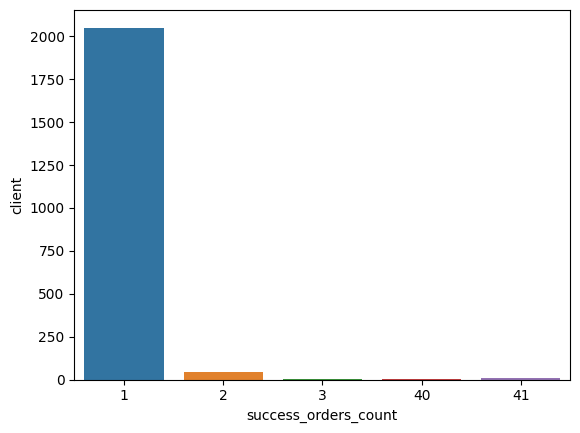

In [31]:
sns.barplot(x='success_orders_count', y='client', data=result_df)

### Task 7

In [32]:
res_df = df_logs_and_user_data.query('success == True and platform == "computer"')

In [33]:
res_df

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


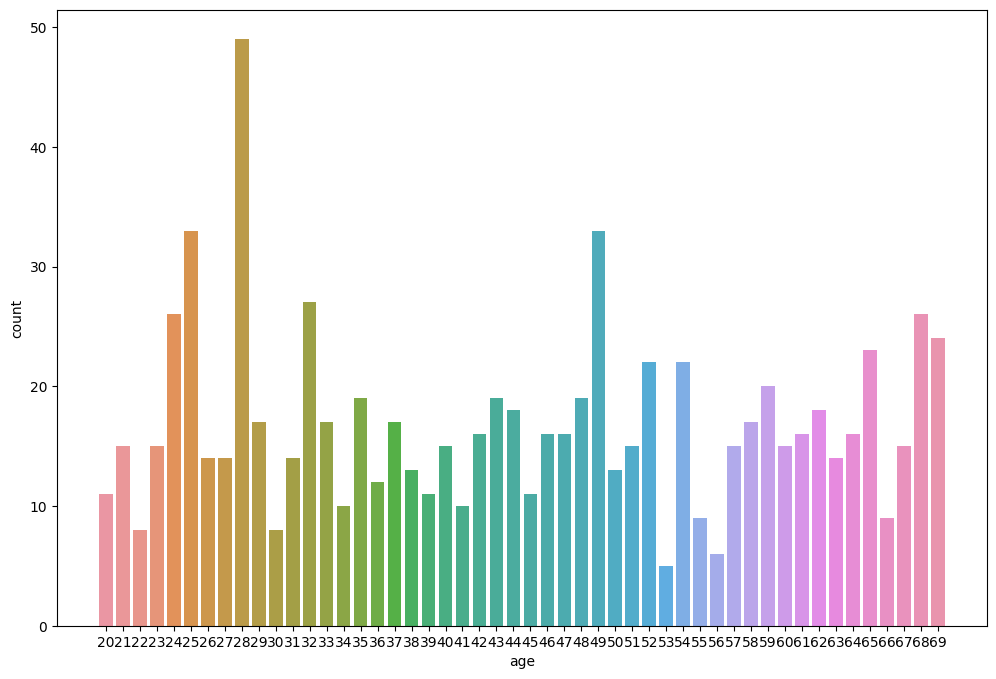

In [34]:
# в таком виде датафрейм должен быть без группировки
plt.figure(figsize=(12,8))
sns.countplot(x='age', data=res_df).autoscale()